In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np

In [6]:
clinical_attributes = pd.read_csv('step_04/clinical_attributes.csv')
z_score = pd.read_csv('step_04/z_score.csv')
mutation = pd.read_csv('step_04/mutation.csv')
response = pd.read_csv('step_04/response.csv')

In [4]:
response

,overall_survival
0,1
1,0
2,1
3,1
4,1
...,...
1177,0
1178,1
1179,1
1180,0


## Separación en ( train (80) + val (20) )[90] + test [10]

In [8]:
seed = 255

In [43]:
X_clinical_train_val, X_clinical_test, y_train_val, y_test = train_test_split(clinical_attributes, response, test_size=0.1, random_state=seed)
X_clinical_train, X_clinical_val, y_train, y_val = train_test_split(X_clinical_train_val, y_train_val, test_size=0.2, random_state=seed)

X_mutation_train_val, X_mutation_test, _, _ = train_test_split(mutation, response, test_size=0.1, random_state=seed)
X_mutation_train, X_mutation_val, _, _ = train_test_split(X_mutation_train_val, y_train_val, test_size=0.2, random_state=seed)

X_z_score_train_val, X_z_score_test, _, _ = train_test_split(z_score, response, test_size=0.1, random_state=seed)
X_z_score_train, X_z_score_val, _, _ = train_test_split(X_z_score_train_val, y_train_val, test_size=0.2, random_state=seed)

# Model testing

In [4]:
from joblib import dump

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

## KNN (Punto 2)

In [8]:
hyperparameters = [
    ("n_neighbors", [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101]),
    ("weights",['uniform', 'distance']),
    ("p", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
    ("algorithm", ['auto', 'ball_tree', 'kd_tree', 'brute']),
    ("leaf_size", [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]),
    ("metric", ['euclidean', 'manhattan', 'chebyshev', 'minkowski'])
]
datasets = [
    ("clinical", X_clinical_train, X_clinical_val, X_clinical_test),
    ("mutation", X_mutation_train, X_mutation_val, X_mutation_test),
    ("z_score", X_z_score_train, X_z_score_val, X_z_score_test)
]

In [9]:
metrics = []
for hyperparameter, values in hyperparameters:
    for value in values:
        if hyperparameter == "n_neighbors":
            model = KNeighborsClassifier(n_neighbors=value)
        elif hyperparameter == "weights":
            model = KNeighborsClassifier(weights=value)
        elif hyperparameter == "p":
            model = KNeighborsClassifier(p=value)
        elif hyperparameter == "algorithm":
            model = KNeighborsClassifier(algorithm=value)
        elif hyperparameter == "leaf_size":
            model = KNeighborsClassifier(leaf_size=value)
        elif hyperparameter == "metric":
            model = KNeighborsClassifier(metric=value)
            
        for dataset, X_train, X_val, X_test in datasets:
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_val)
            
            accuracy_val = accuracy_score(y_val, y_pred)
            precision_val = precision_score(y_val, y_pred, average='weighted')
            recall_val = recall_score(y_val, y_pred, average='weighted')
            f1_val = f1_score(y_val, y_pred, average='weighted')  

            y_pred = model.predict(X_test)

            accuracy_test = accuracy_score(y_test, y_pred)
            precision_test = precision_score(y_test, y_pred, average='weighted')
            recall_test = recall_score(y_test, y_pred, average='weighted')
            f1_test = f1_score(y_test, y_pred, average='weighted')
            
            metrics.append([dataset, hyperparameter, value, accuracy_val, precision_val, recall_val, f1_val, accuracy_test, precision_test, recall_test, f1_test])

df = pd.DataFrame(metrics, columns=["dataset",'hyperparameter', 'value', 'accuracy_val', 'precision_val', 'recall_val', 'f1_val', 'accuracy_test', 'precision_test', 'recall_test', 'f1_test']).sort_values(by='f1_test', ascending=False)
df

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarnin

,dataset,hyperparameter,value,accuracy_val,precision_val,recall_val,f1_val,accuracy_test,precision_test,recall_test,f1_test
51,clinical,n_neighbors,67,0.563380,0.560819,0.563380,0.561094,0.655462,0.657781,0.655462,0.655462
42,clinical,n_neighbors,53,0.568075,0.566860,0.568075,0.567268,0.655462,0.661278,0.655462,0.654585
15,clinical,n_neighbors,17,0.600939,0.599246,0.600939,0.599442,0.655462,0.663618,0.655462,0.653852
20,z_score,n_neighbors,19,0.591549,0.603073,0.591549,0.590306,0.663866,0.701083,0.663866,0.652758
47,z_score,n_neighbors,59,0.577465,0.595468,0.577465,0.572972,0.663866,0.708250,0.663866,0.650489
...,...,...,...,...,...,...,...,...,...,...,...
61,mutation,n_neighbors,79,0.460094,0.211686,0.460094,0.289963,0.478992,0.229433,0.478992,0.310256
67,mutation,n_neighbors,89,0.460094,0.211686,0.460094,0.289963,0.478992,0.229433,0.478992,0.310256
70,mutation,n_neighbors,97,0.460094,0.211686,0.460094,0.289963,0.478992,0.229433,0.478992,0.310256
46,mutation,n_neighbors,59,0.455399,0.210515,0.455399,0.287930,0.470588,0.227318,0.470588,0.306555


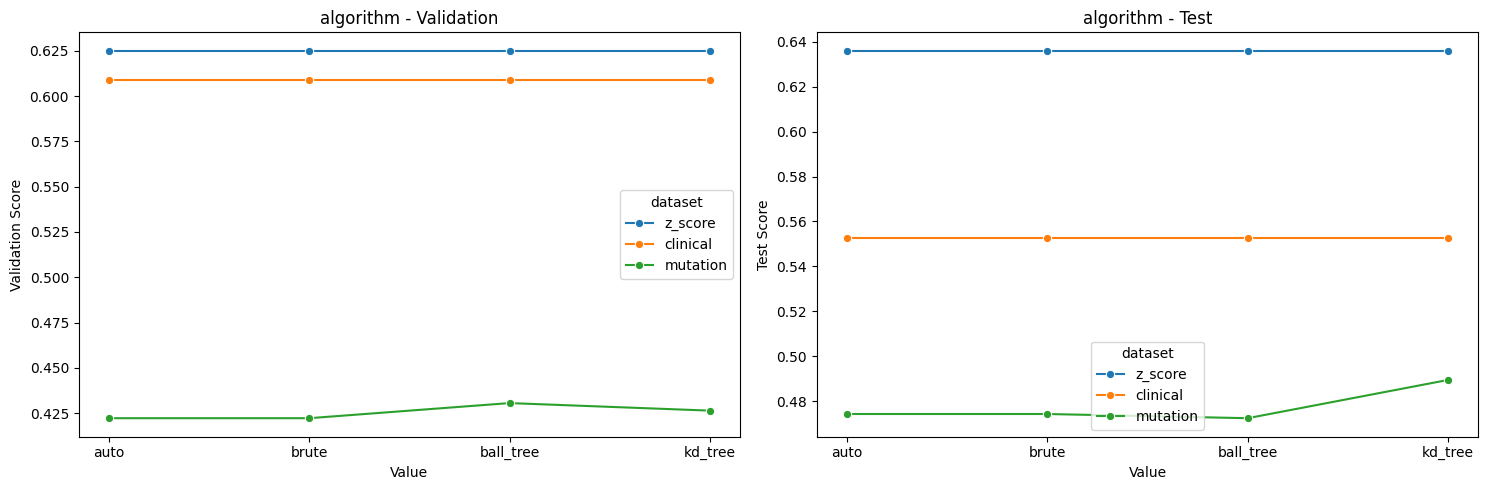

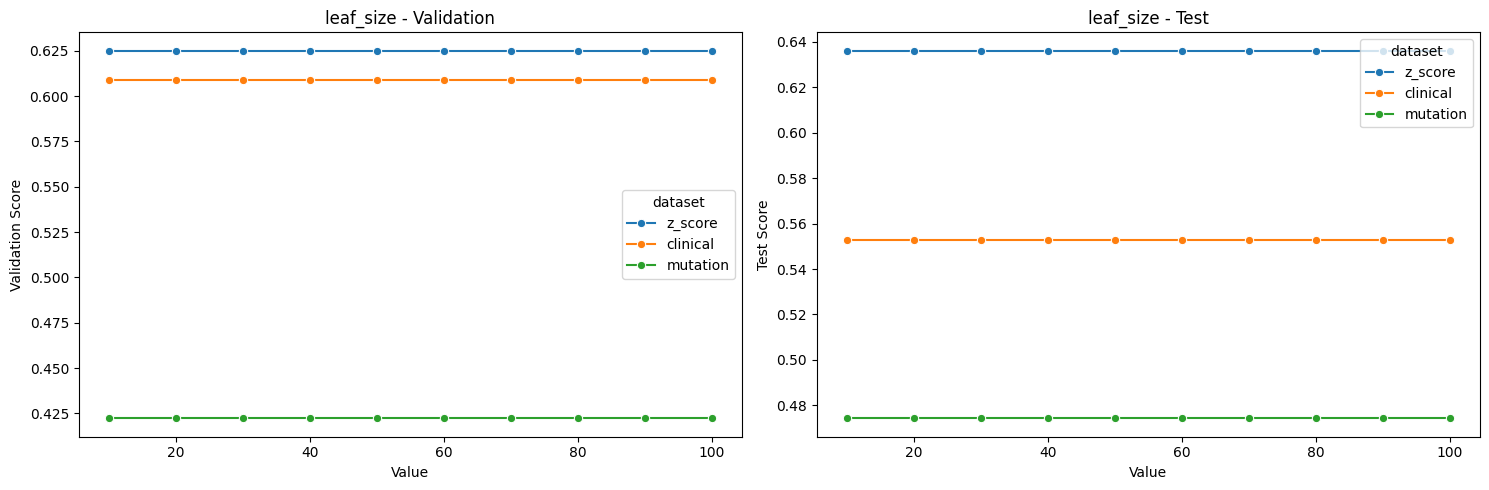

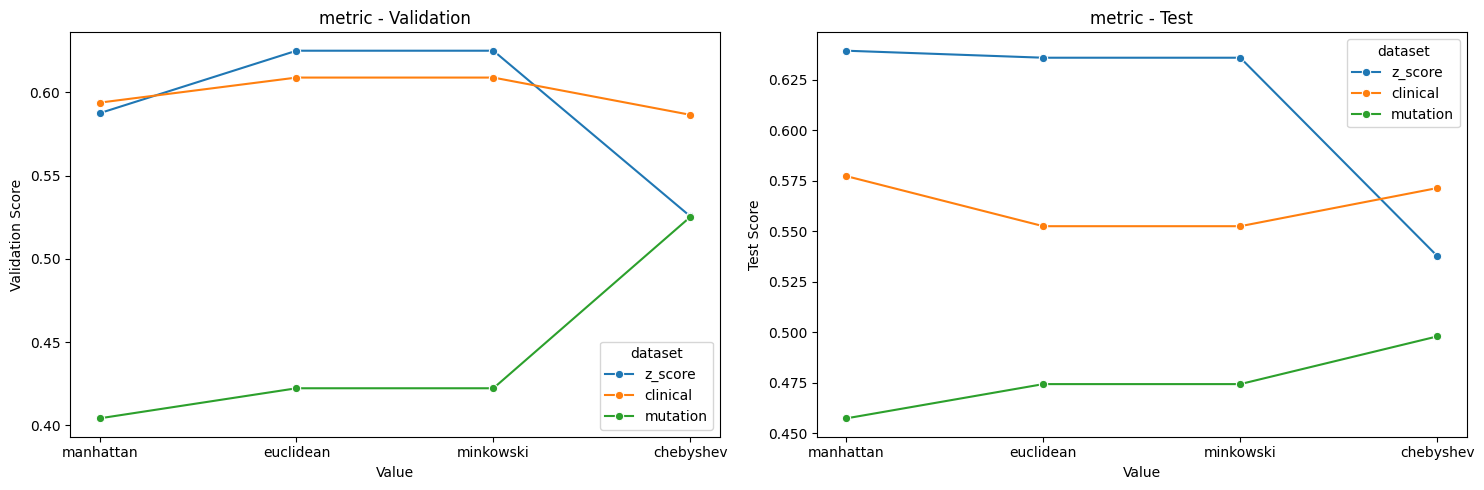

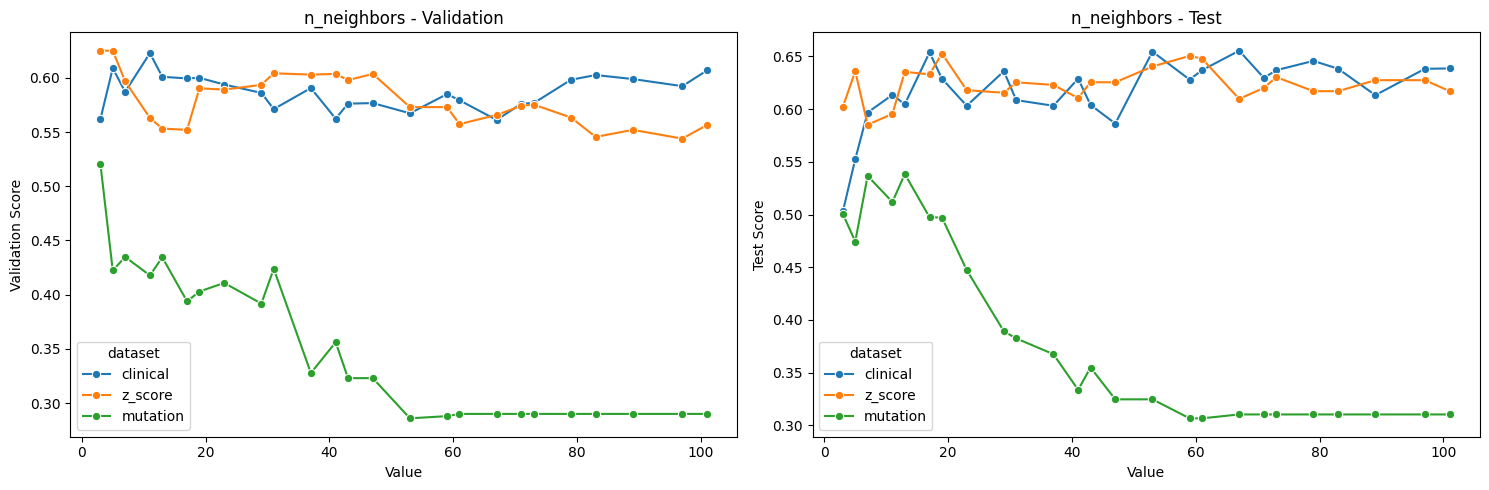

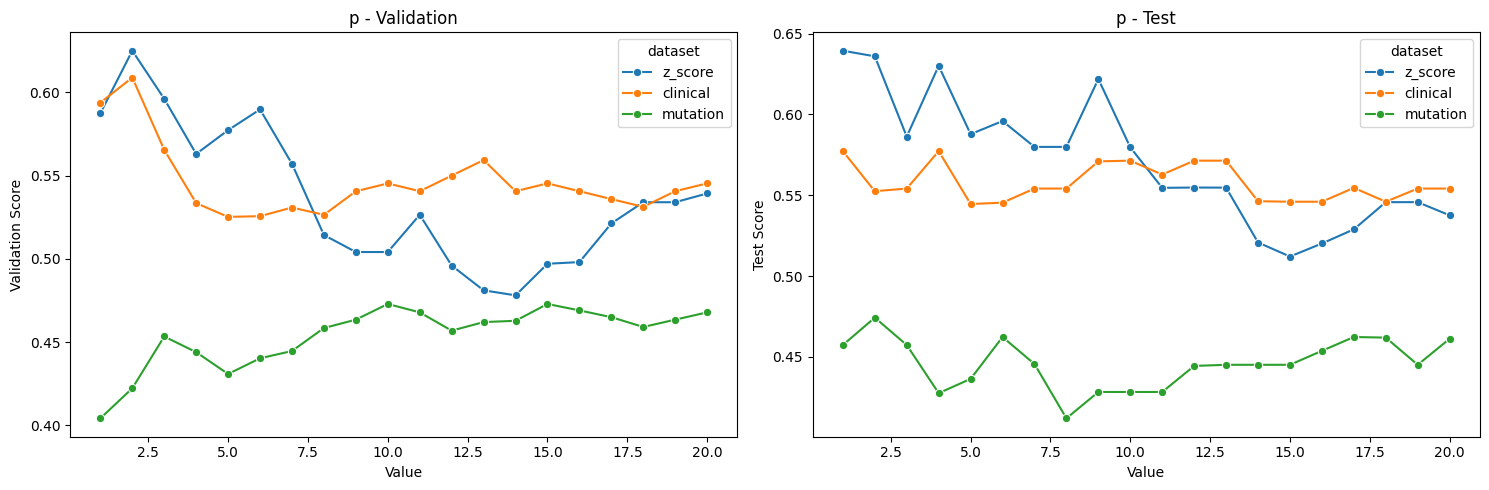

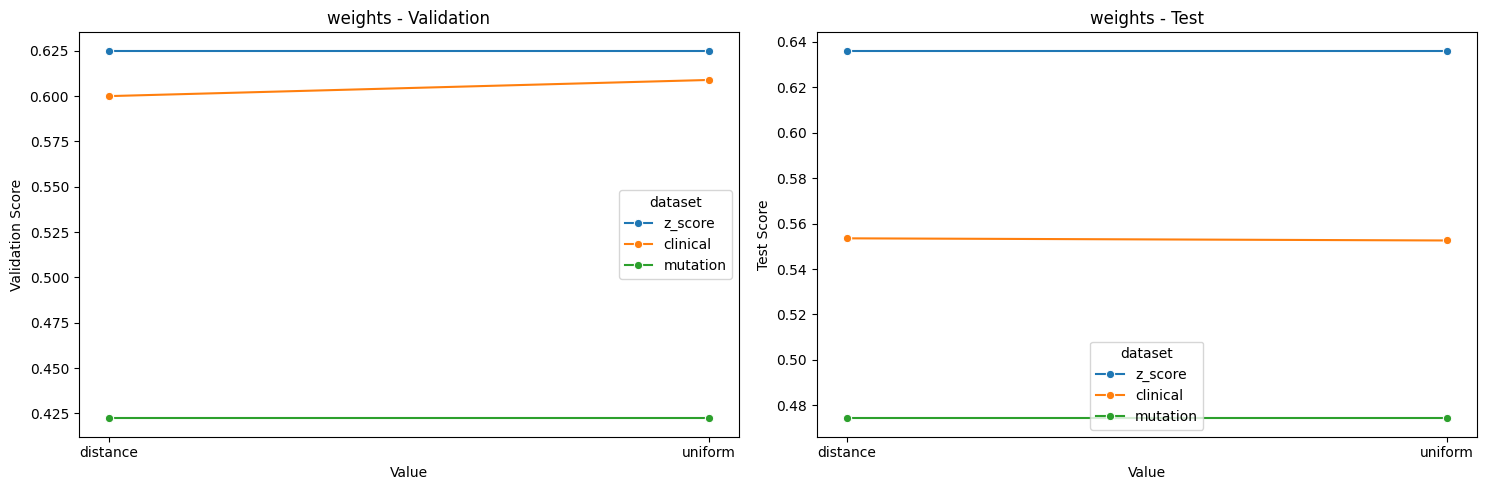

In [10]:
# Group by 'hyperparameter'
grouped = df.groupby('hyperparameter')

metrics = df.columns[3:]

# Plot for each hyperparameter group
for row_idx, (name, group) in enumerate(grouped):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot validation scores
    sns.lineplot(data=group, x="value", y="f1_val", hue='dataset', marker='o', ax=axs[0])
    axs[0].set_title(f'{name} - Validation')
    axs[0].set_ylabel("Validation Score")
    axs[0].set_xlabel("Value")

    # Plot test scores
    sns.lineplot(data=group, x="value", y="f1_test", hue='dataset', marker='o', ax=axs[1])
    axs[1].set_title(f'{name} - Test')
    axs[1].set_ylabel("Test Score")
    axs[1].set_xlabel("Value")

    plt.tight_layout()
    plt.show()


## Decision Tree (Punto 2)

In [11]:
hyperparameters = [
    ("criterion", ["gini", "entropy", "log_loss"]),
    ("splitter", ["best", "random"]),
    ("max_depth", [None, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
    ("min_samples_split", [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
    ("min_samples_leaf", [1, 2, 4, 8, 16, 32, 64]),
    ("max_features", [None, "sqrt", "log2", 2, 4, 6, 8])
]
datasets = [
    ("clinical", X_clinical_train, X_clinical_val, X_clinical_test),
    ("mutation", X_mutation_train, X_mutation_val, X_mutation_test),
    ("z_score", X_z_score_train, X_z_score_val, X_z_score_test)
]

In [12]:
metrics = []
for hyperparameter, values in hyperparameters:
    for value in values:
        if hyperparameter == "criterion":
            model = DecisionTreeClassifier(criterion=value)
        elif hyperparameter == "splitter":
            model = DecisionTreeClassifier(splitter=value)
        elif hyperparameter == "max_depth":
            model = DecisionTreeClassifier(max_depth=value)
        elif hyperparameter == "min_samples_split":
            model = DecisionTreeClassifier(min_samples_split=value)
        elif hyperparameter == "min_samples_leaf":
            model = DecisionTreeClassifier(min_samples_leaf=value)
        elif hyperparameter == "max_features":
            model = DecisionTreeClassifier(max_features=value)
            
        for dataset, X_train, X_val, X_test in datasets:
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_val)
            
            accuracy_val = accuracy_score(y_val, y_pred)
            precision_val = precision_score(y_val, y_pred, average='weighted')
            recall_val = recall_score(y_val, y_pred, average='weighted')
            f1_val = f1_score(y_val, y_pred, average='weighted')  

            y_pred = model.predict(X_test)

            accuracy_test = accuracy_score(y_test, y_pred)
            precision_test = precision_score(y_test, y_pred, average='weighted')
            recall_test = recall_score(y_test, y_pred, average='weighted')
            f1_test = f1_score(y_test, y_pred, average='weighted')
            
            metrics.append([dataset, hyperparameter, value, accuracy_val, precision_val, recall_val, f1_val, accuracy_test, precision_test, recall_test, f1_test])

df = pd.DataFrame(metrics, columns=["dataset",'hyperparameter', 'value', 'accuracy_val', 'precision_val', 'recall_val', 'f1_val', 'accuracy_test', 'precision_test', 'recall_test', 'f1_test']).sort_values(by='f1_test', ascending=False)
df

,dataset,hyperparameter,value,accuracy_val,precision_val,recall_val,f1_val,accuracy_test,precision_test,recall_test,f1_test
117,clinical,min_samples_leaf,32,0.657277,0.661783,0.657277,0.657776,0.697479,0.702804,0.697479,0.696966
114,clinical,min_samples_leaf,16,0.633803,0.633296,0.633803,0.633494,0.680672,0.680672,0.680672,0.680672
75,clinical,min_samples_split,12,0.549296,0.549296,0.549296,0.549296,0.672269,0.672549,0.672269,0.672362
108,clinical,min_samples_leaf,4,0.549296,0.548631,0.549296,0.548915,0.672269,0.672086,0.672269,0.672130
78,clinical,min_samples_split,13,0.553991,0.555039,0.553991,0.554405,0.663866,0.664525,0.663866,0.664008
...,...,...,...,...,...,...,...,...,...,...,...
82,mutation,min_samples_split,14,0.553991,0.554331,0.553991,0.554149,0.453782,0.455854,0.453782,0.453241
85,mutation,min_samples_split,15,0.586854,0.586854,0.586854,0.586854,0.453782,0.456225,0.453782,0.452391
64,mutation,min_samples_split,8,0.553991,0.555039,0.553991,0.554405,0.445378,0.446100,0.445378,0.445613
79,mutation,min_samples_split,13,0.553991,0.553658,0.553991,0.553812,0.445378,0.446100,0.445378,0.445613


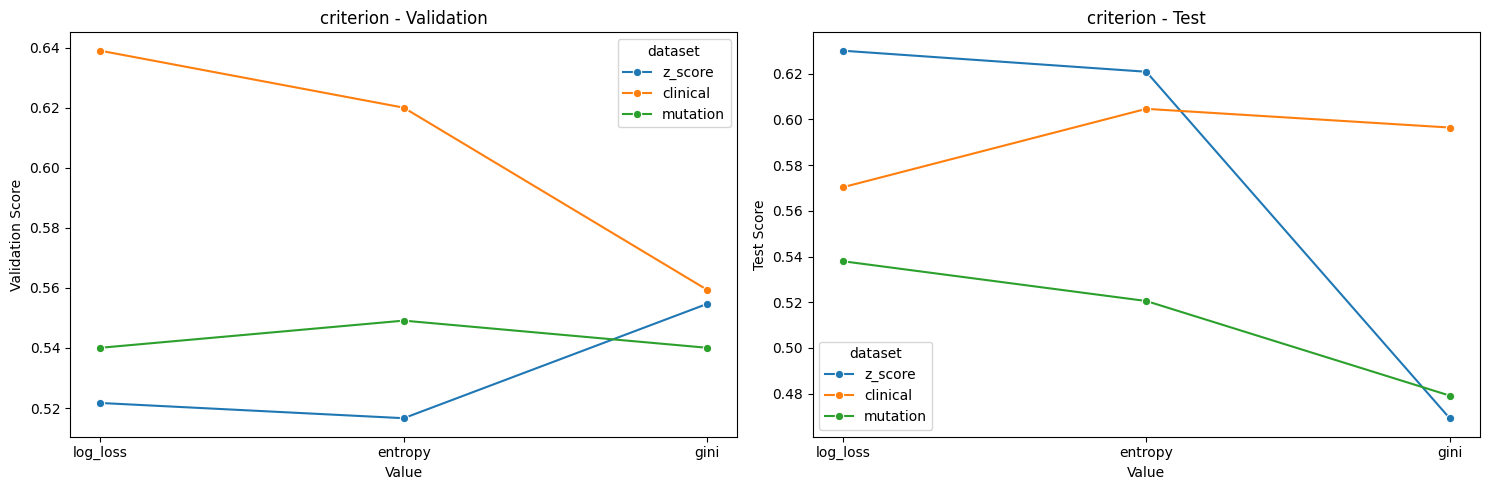

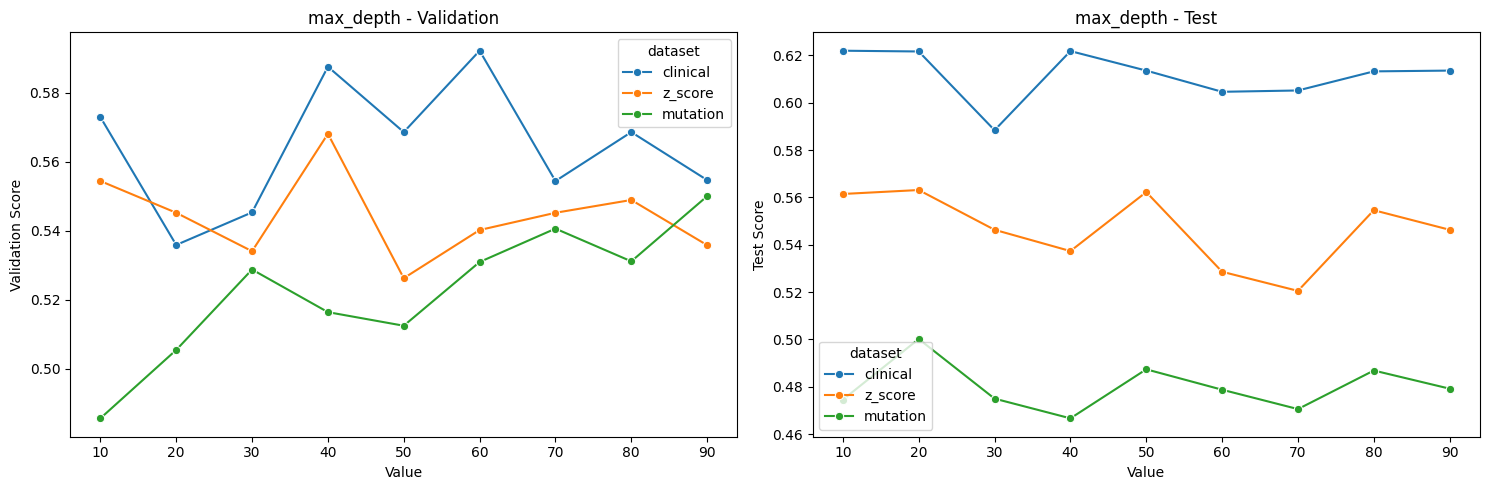

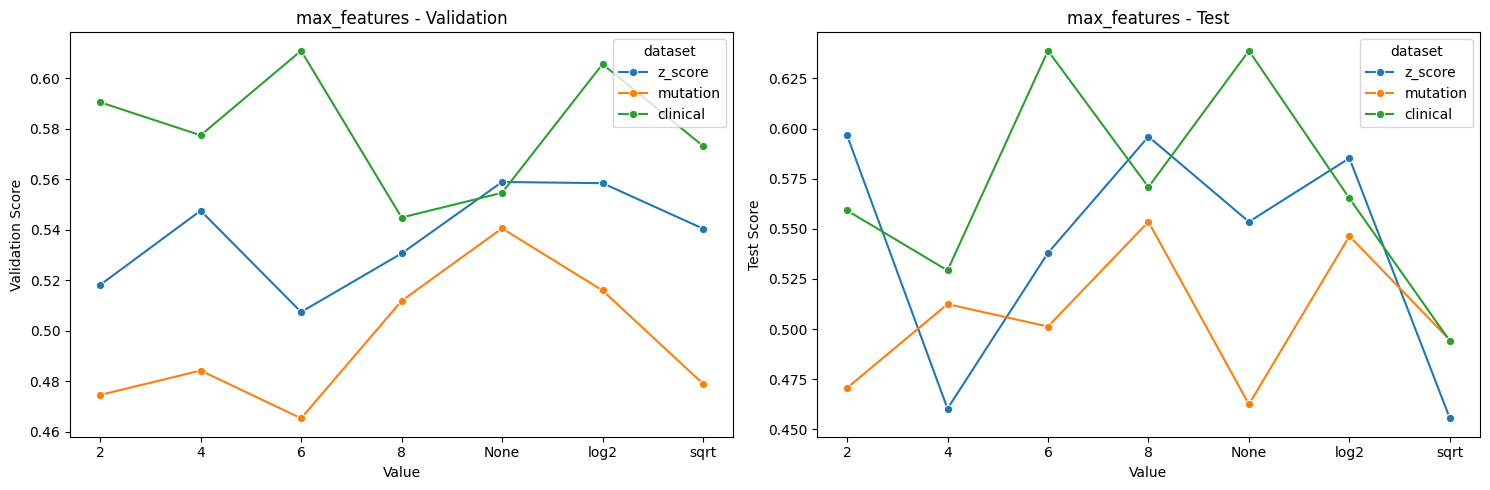

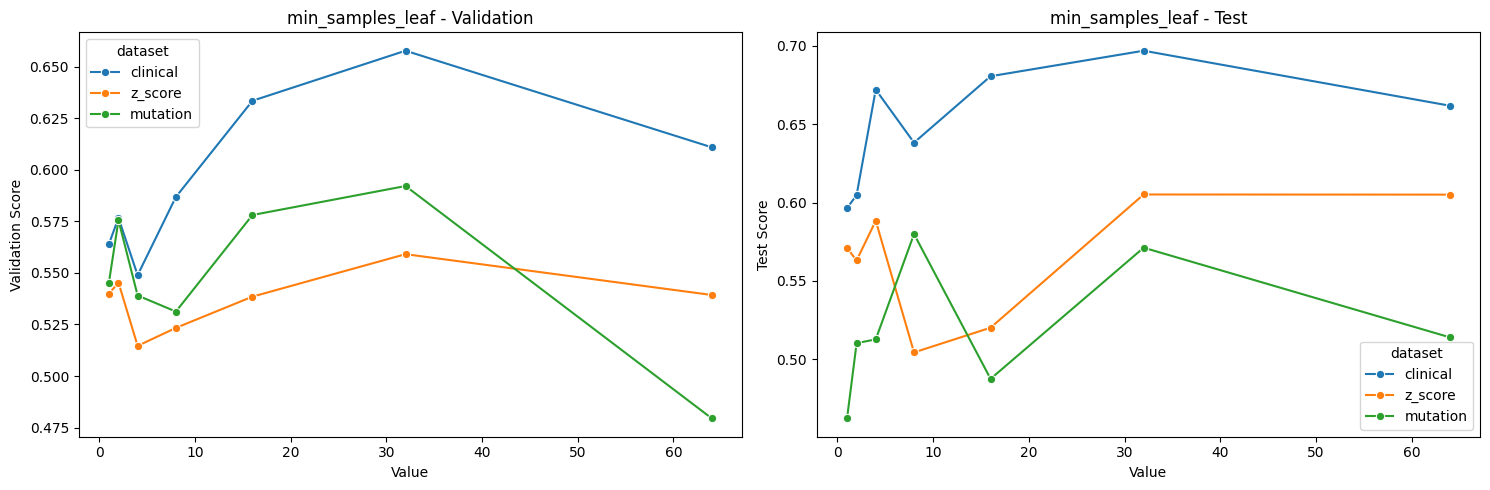

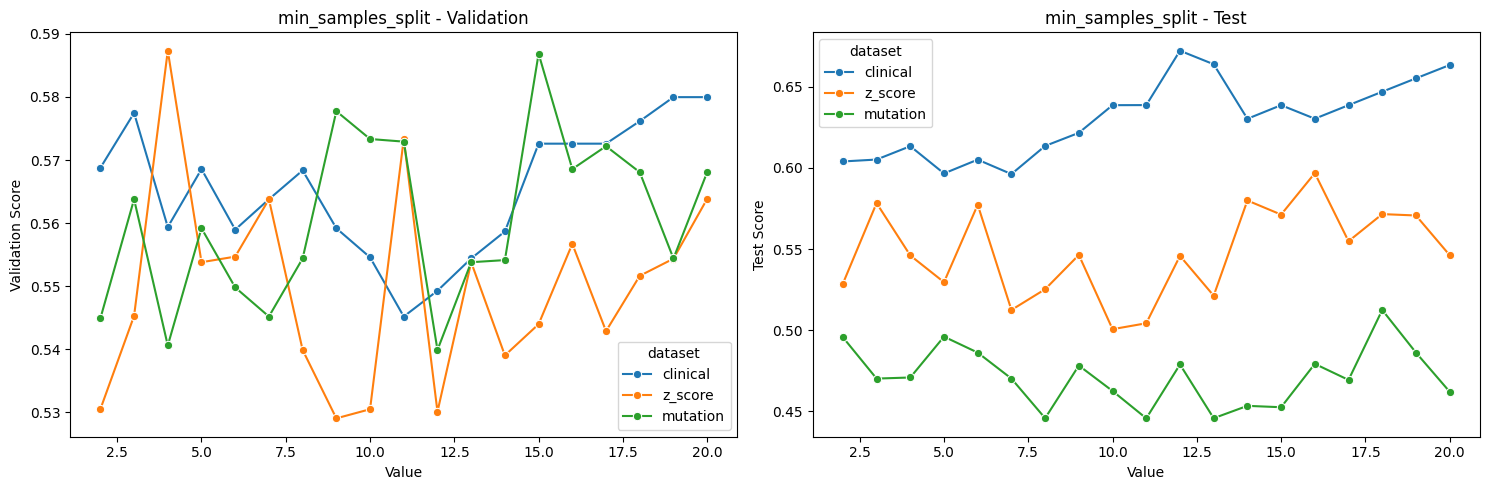

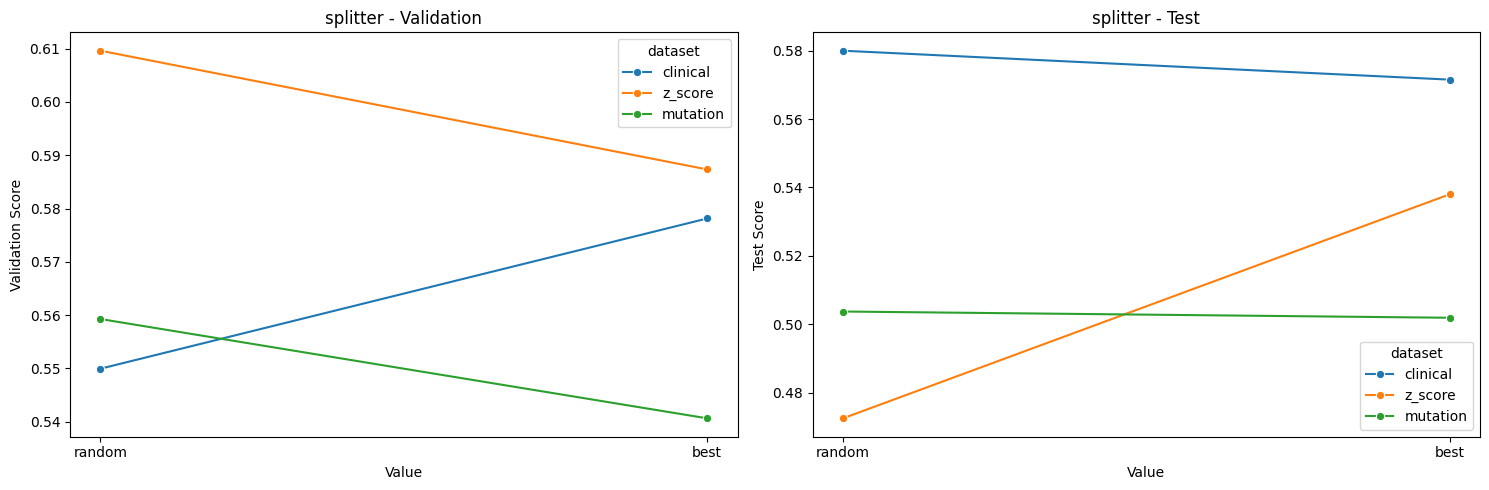

In [13]:
# Group by 'hyperparameter'
grouped = df.groupby('hyperparameter')

metrics = df.columns[3:]

# Plot for each hyperparameter group
for row_idx, (name, group) in enumerate(grouped):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot validation scores
    try:
        sns.lineplot(data=group, x="value", y="f1_val", hue='dataset', marker='o', ax=axs[0])
    except:
        group["value"] = group["value"].astype(str)
        group.sort_values(by='value', inplace=True)
        sns.lineplot(data=group, x="value", y="f1_val", hue='dataset', marker='o', ax=axs[0])
    axs[0].set_title(f'{name} - Validation')
    axs[0].set_ylabel("Validation Score")
    axs[0].set_xlabel("Value")

    # Plot test scores
    sns.lineplot(data=group, x="value", y="f1_test", hue='dataset', marker='o', ax=axs[1])
    axs[1].set_title(f'{name} - Test')
    axs[1].set_ylabel("Test Score")
    axs[1].set_xlabel("Value")

    plt.tight_layout()
    plt.show()

# Random Forest (Punto 2)

In [58]:
hyperparameters = [
    ("n_estimators",[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]),
    ("criterion",["gini", "entropy", "log_loss"]),
    ("max_depth",[None, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
    ("min_samples_split",[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
    ("min_samples_leaf",[1, 2, 4, 8, 16, 32, 64]),
    ("max_features",[None, "sqrt", "log2"]),
    ("max_leaf_nodes",[None, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
    ("min_impurity_decrease",[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
    ("bootstrap",[True, False]),
    ("oob_score",[True, False]),
    ("random_state",[42, 255, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]),
    ("class_weight",[None, "balanced", "balanced_subsample"]),
    ("ccp_alpha",[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
    ("max_samples",[None, 10, 20, 30, 40, 50, 60, 70, 80, 90])
]
datasets = [
    ("clinical", X_clinical_train, X_clinical_val, X_clinical_test),
    ("mutation", X_mutation_train, X_mutation_val, X_mutation_test),
    ("z_score", X_z_score_train, X_z_score_val, X_z_score_test)
]

In [62]:
metrics = []
for hyperparameter, values in hyperparameters:
    for value in values:
        if hyperparameter == "n_estimators":
            model = RandomForestClassifier(n_estimators=value)
        elif hyperparameter == "criterion":
            model = RandomForestClassifier(criterion=value)
        elif hyperparameter == "max_depth":
            model = RandomForestClassifier(max_depth=value)
        elif hyperparameter == "min_samples_split":
            model = RandomForestClassifier(min_samples_split=value)
        elif hyperparameter == "min_samples_leaf":
            model = RandomForestClassifier(min_samples_leaf=value)
        elif hyperparameter == "max_features":
            model = RandomForestClassifier(max_features=value)
        elif hyperparameter == "max_leaf_nodes":
            model = RandomForestClassifier(max_leaf_nodes=value)
        elif hyperparameter == "min_impurity_decrease":
            model = RandomForestClassifier(min_impurity_decrease=value)
        elif hyperparameter == "bootstrap":
            model = RandomForestClassifier(bootstrap=value)
        elif hyperparameter == "oob_score":
            model = RandomForestClassifier(oob_score=value)
        elif hyperparameter == "random_state":
            model = RandomForestClassifier(random_state=value)
        elif hyperparameter == "class_weight":
            model = RandomForestClassifier(class_weight=value)
        elif hyperparameter == "ccp_alpha":
            model = RandomForestClassifier(ccp_alpha=value)
        elif hyperparameter == "max_samples":
            model = RandomForestClassifier(max_samples=value)
            
        for dataset, X_train, X_val, X_test in datasets:
            print(f"running {dataset} {hyperparameter} {value}")
            y = y_train.values.ravel()
            model.fit(X_train, y)
            
            y_pred = model.predict(X_val)
            
            accuracy_val = accuracy_score(y_val, y_pred)
            precision_val = precision_score(y_val, y_pred, average='weighted')
            recall_val = recall_score(y_val, y_pred, average='weighted')
            f1_val = f1_score(y_val, y_pred, average='weighted')  

            y_pred = model.predict(X_test)

            accuracy_test = accuracy_score(y_test, y_pred)
            precision_test = precision_score(y_test, y_pred, average='weighted')
            recall_test = recall_score(y_test, y_pred, average='weighted')
            f1_test = f1_score(y_test, y_pred, average='weighted')
            
            metrics.append([dataset, hyperparameter, value, accuracy_val, precision_val, recall_val, f1_val, accuracy_test, precision_test, recall_test, f1_test])

df = pd.DataFrame(metrics, columns=["dataset",'hyperparameter', 'value', 'accuracy_val', 'precision_val', 'recall_val', 'f1_val', 'accuracy_test', 'precision_test', 'recall_test', 'f1_test']).sort_values(by='f1_test', ascending=False)
df

running clinical n_estimators 10
running mutation n_estimators 10
running z_score n_estimators 10
running clinical n_estimators 20
running mutation n_estimators 20
running z_score n_estimators 20
running clinical n_estimators 30
running mutation n_estimators 30
running z_score n_estimators 30
running clinical n_estimators 40
running mutation n_estimators 40
running z_score n_estimators 40
running clinical n_estimators 50
running mutation n_estimators 50
running z_score n_estimators 50
running clinical n_estimators 60
running mutation n_estimators 60
running z_score n_estimators 60
running clinical n_estimators 70
running mutation n_estimators 70
running z_score n_estimators 70
running clinical n_estimators 80
running mutation n_estimators 80
running z_score n_estimators 80
running clinical n_estimators 90
running mutation n_estimators 90
running z_score n_estimators 90
running clinical n_estimators 100
running mutation n_estimators 100
running z_score n_estimators 100
running clinical 

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical min_impurity_decrease 0.2
running mutation min_impurity_decrease 0.2
running z_score min_impurity_decrease 0.2


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical min_impurity_decrease 0.3
running mutation min_impurity_decrease 0.3
running z_score min_impurity_decrease 0.3


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical min_impurity_decrease 0.4
running mutation min_impurity_decrease 0.4
running z_score min_impurity_decrease 0.4


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical min_impurity_decrease 0.5
running mutation min_impurity_decrease 0.5
running z_score min_impurity_decrease 0.5


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical min_impurity_decrease 0.6
running mutation min_impurity_decrease 0.6
running z_score min_impurity_decrease 0.6


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical min_impurity_decrease 0.7
running mutation min_impurity_decrease 0.7
running z_score min_impurity_decrease 0.7


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical min_impurity_decrease 0.8
running mutation min_impurity_decrease 0.8
running z_score min_impurity_decrease 0.8


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical min_impurity_decrease 0.9
running mutation min_impurity_decrease 0.9


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score min_impurity_decrease 0.9


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running clinical bootstrap True
running mutation bootstrap True
running z_score bootstrap True
running clinical bootstrap False
running mutation bootstrap False
running z_score bootstrap False
running clinical oob_score True
running mutation oob_score True
running z_score oob_score True
running clinical oob_score False
running mutation oob_score False
running z_score oob_score False
running clinical random_state 42
running mutation random_state 42
running z_score random_state 42
running clinical random_state 255
running mutation random_state 255
running z_score random_state 255
running clinical random_state 1024
running mutation random_state 1024
running z_score random_state 1024
running clinical random_state 2048
running mutation random_state 2048
running z_score random_state 2048
running clinical random_state 4096
running mutation random_state 4096
running z_score random_state 4096
running clinical random_state 8192
running mutation random_state 8192
running z_score random_state 8192

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running z_score ccp_alpha 0.1


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical ccp_alpha 0.2
running mutation ccp_alpha 0.2


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score ccp_alpha 0.2


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical ccp_alpha 0.3
running mutation ccp_alpha 0.3


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score ccp_alpha 0.3


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical ccp_alpha 0.4
running mutation ccp_alpha 0.4


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score ccp_alpha 0.4


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical ccp_alpha 0.5
running mutation ccp_alpha 0.5


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score ccp_alpha 0.5


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical ccp_alpha 0.6
running mutation ccp_alpha 0.6


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score ccp_alpha 0.6


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical ccp_alpha 0.7
running mutation ccp_alpha 0.7


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score ccp_alpha 0.7


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical ccp_alpha 0.8
running mutation ccp_alpha 0.8


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score ccp_alpha 0.8


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

running clinical ccp_alpha 0.9
running mutation ccp_alpha 0.9


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running z_score ccp_alpha 0.9


/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


running clinical max_samples None
running mutation max_samples None
running z_score max_samples None
running clinical max_samples 10
running mutation max_samples 10
running z_score max_samples 10
running clinical max_samples 20
running mutation max_samples 20
running z_score max_samples 20
running clinical max_samples 30
running mutation max_samples 30
running z_score max_samples 30
running clinical max_samples 40
running mutation max_samples 40
running z_score max_samples 40
running clinical max_samples 50
running mutation max_samples 50
running z_score max_samples 50
running clinical max_samples 60
running mutation max_samples 60
running z_score max_samples 60
running clinical max_samples 70
running mutation max_samples 70
running z_score max_samples 70
running clinical max_samples 80
running mutation max_samples 80
running z_score max_samples 80
running clinical max_samples 90
running mutation max_samples 90
running z_score max_samples 90


,dataset,hyperparameter,value,accuracy_val,precision_val,recall_val,f1_val,accuracy_test,precision_test,recall_test,f1_test
36,clinical,criterion,log_loss,0.647887,0.648166,0.647887,0.648012,0.739496,0.744125,0.739496,0.739238
243,clinical,random_state,8192,0.661972,0.661518,0.661972,0.661686,0.705882,0.708379,0.705882,0.705882
84,clinical,min_samples_split,7,0.657277,0.657032,0.657277,0.657140,0.705882,0.710211,0.705882,0.705591
252,clinical,random_state,65536,0.666667,0.665771,0.666667,0.665850,0.705882,0.710211,0.705882,0.705591
183,clinical,max_leaf_nodes,90,0.685446,0.685225,0.685446,0.685320,0.705882,0.710211,0.705882,0.705591
...,...,...,...,...,...,...,...,...,...,...,...
295,mutation,ccp_alpha,0.9,0.460094,0.211686,0.460094,0.289963,0.478992,0.229433,0.478992,0.310256
291,clinical,ccp_alpha,0.8,0.460094,0.211686,0.460094,0.289963,0.478992,0.229433,0.478992,0.310256
292,mutation,ccp_alpha,0.8,0.460094,0.211686,0.460094,0.289963,0.478992,0.229433,0.478992,0.310256
294,clinical,ccp_alpha,0.9,0.460094,0.211686,0.460094,0.289963,0.478992,0.229433,0.478992,0.310256


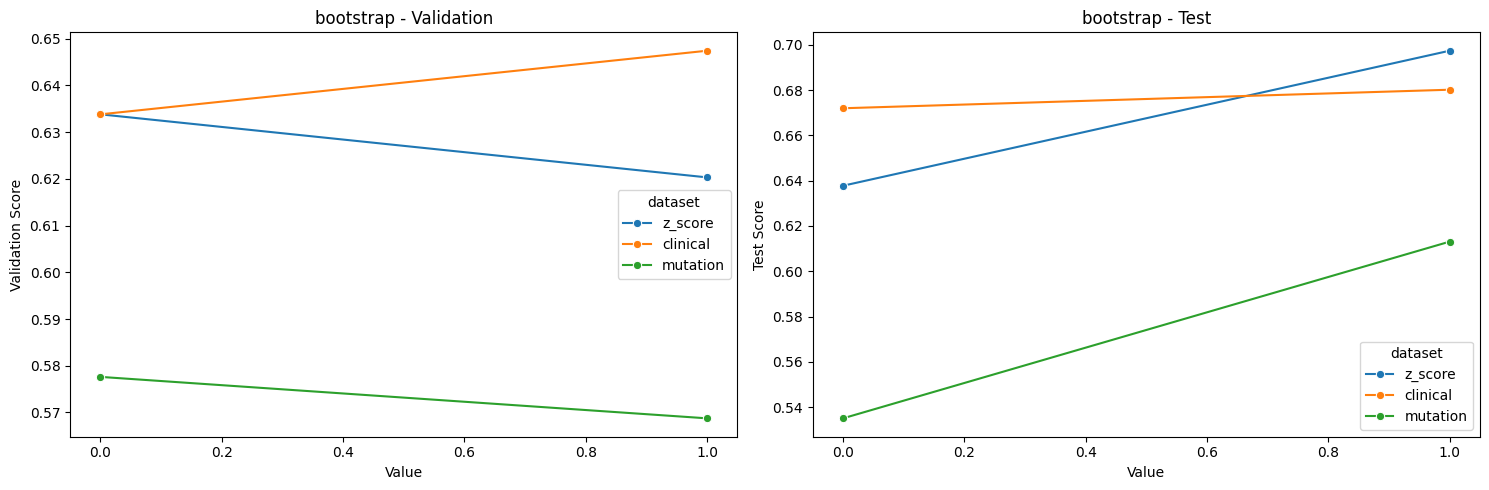

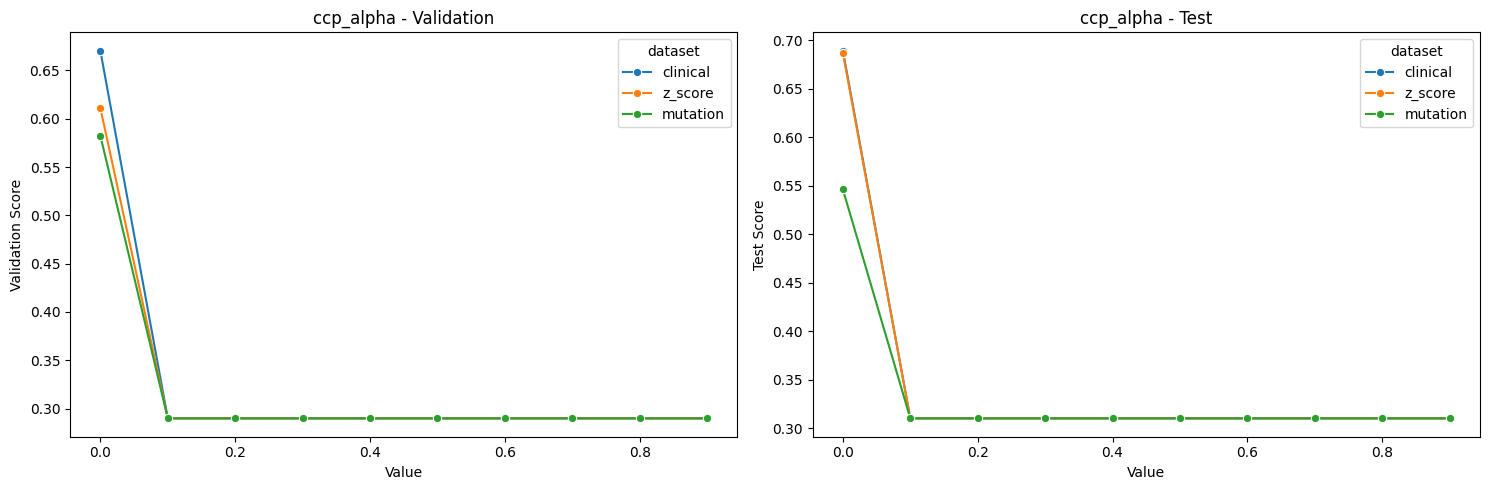

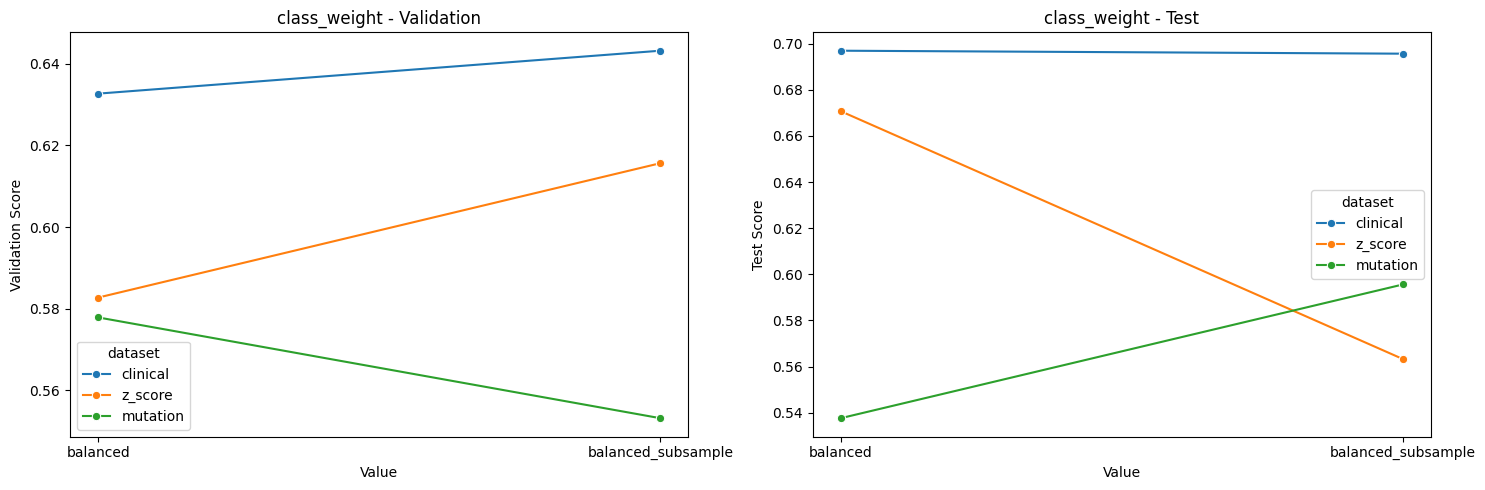

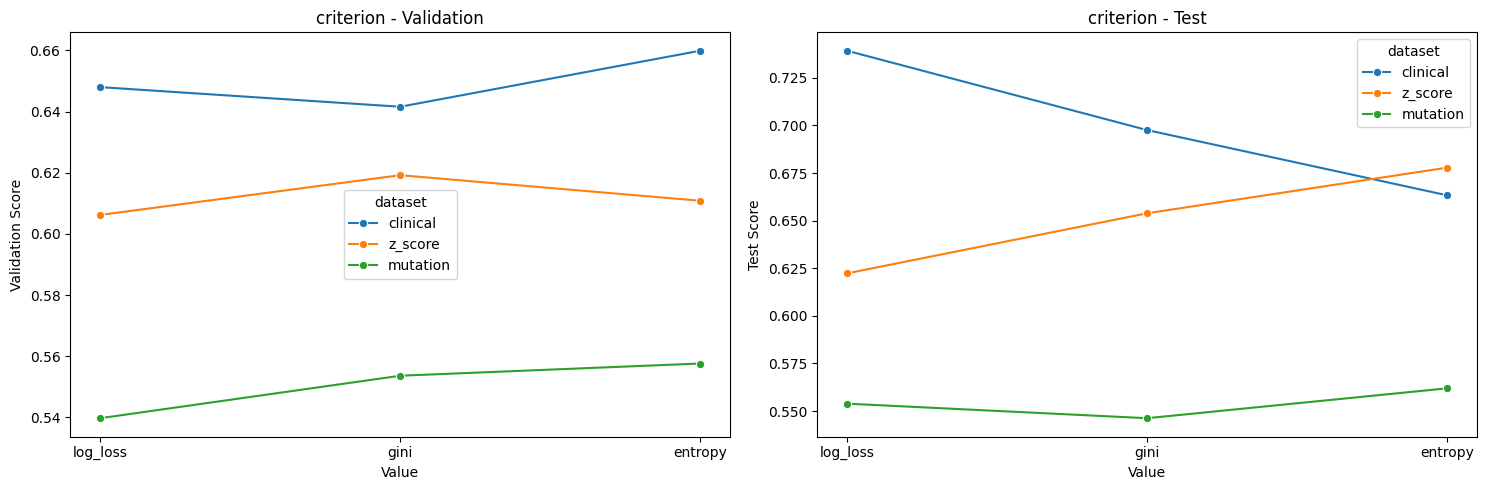

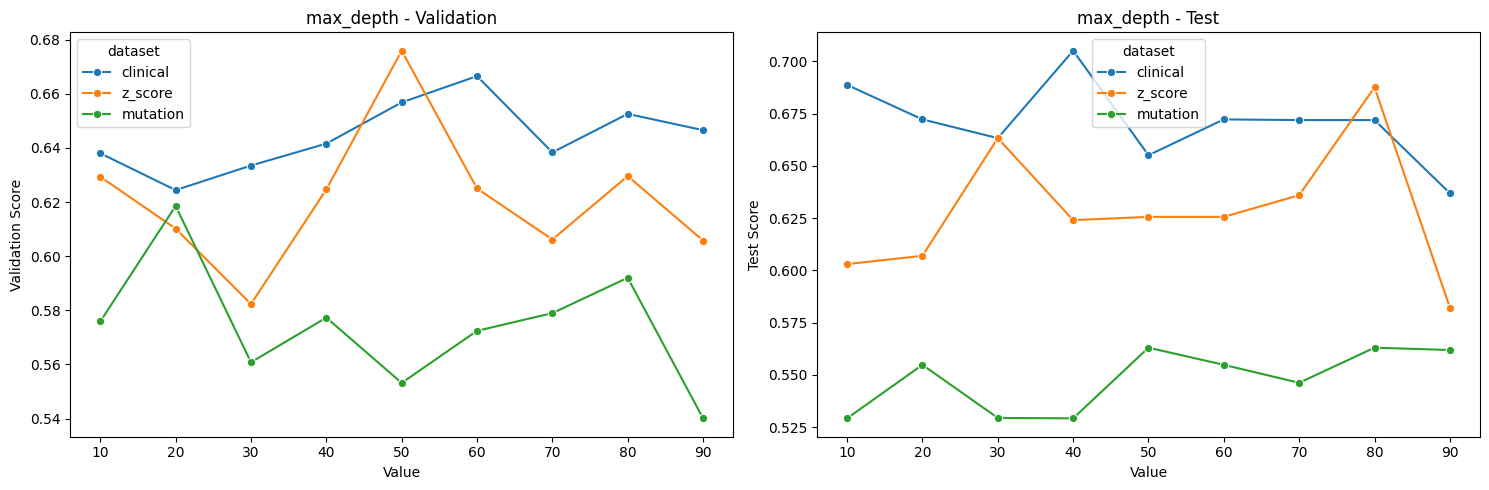

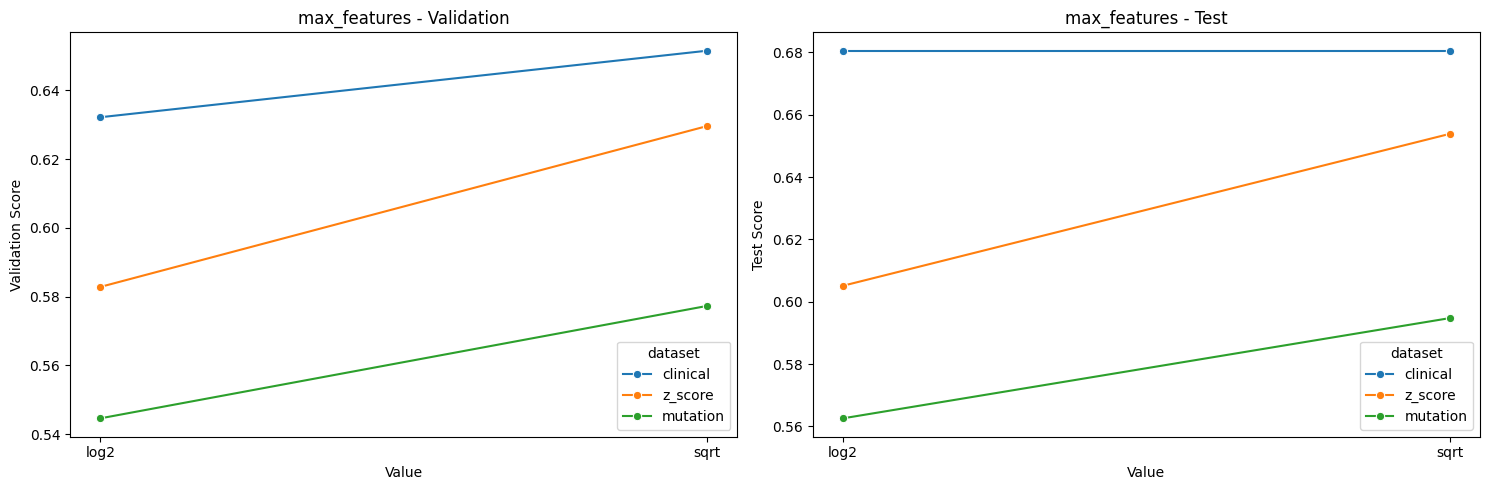

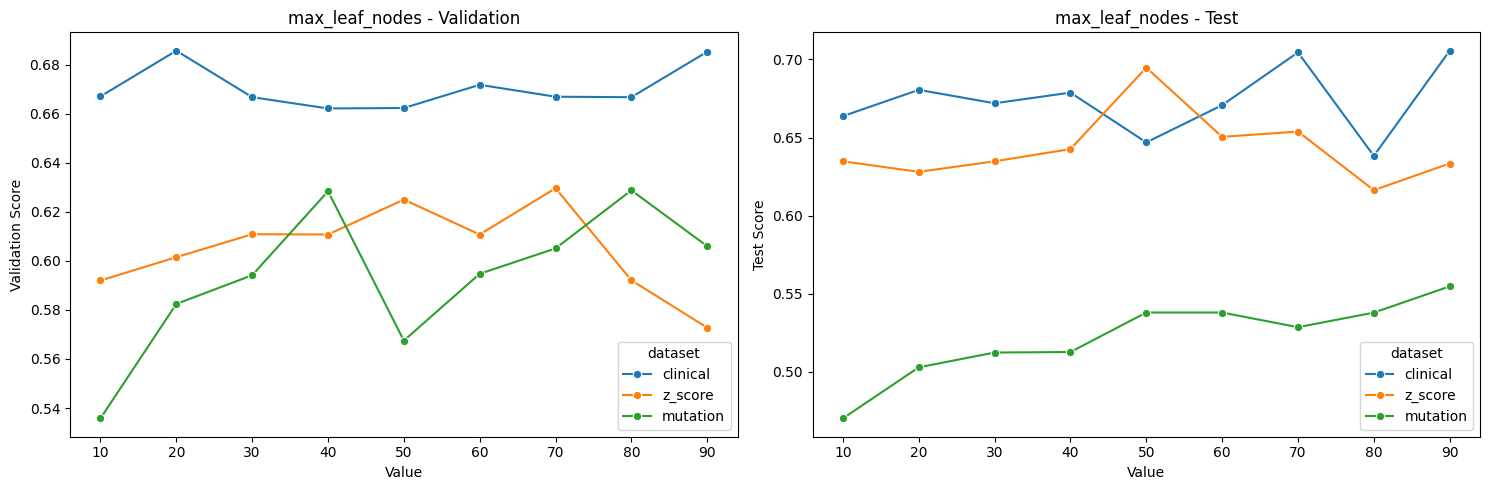

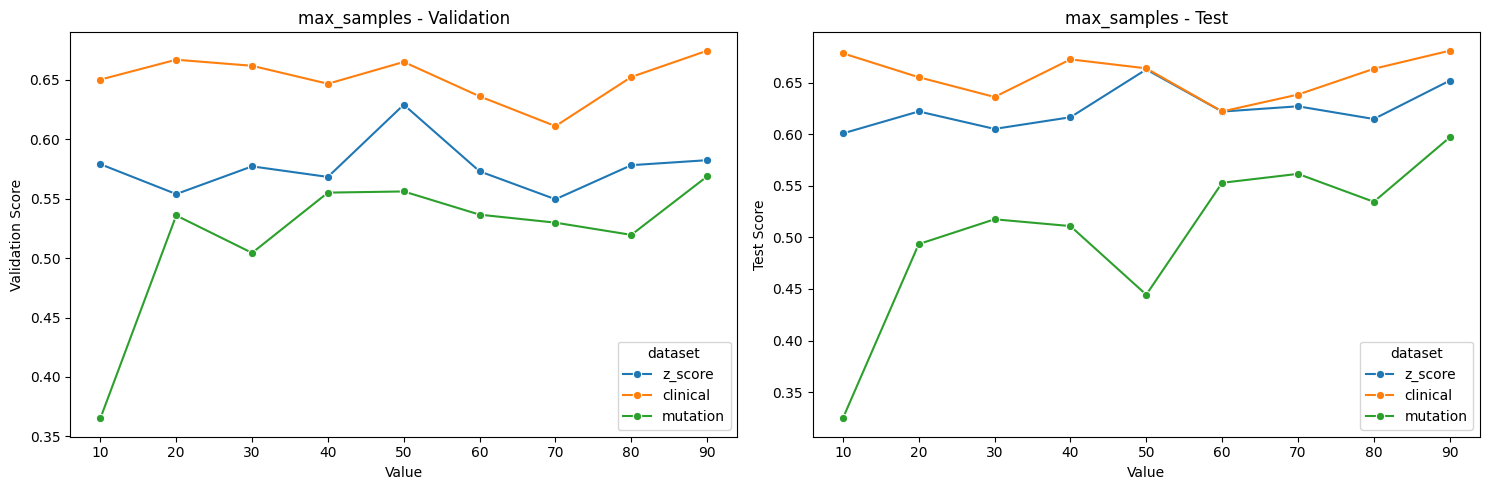

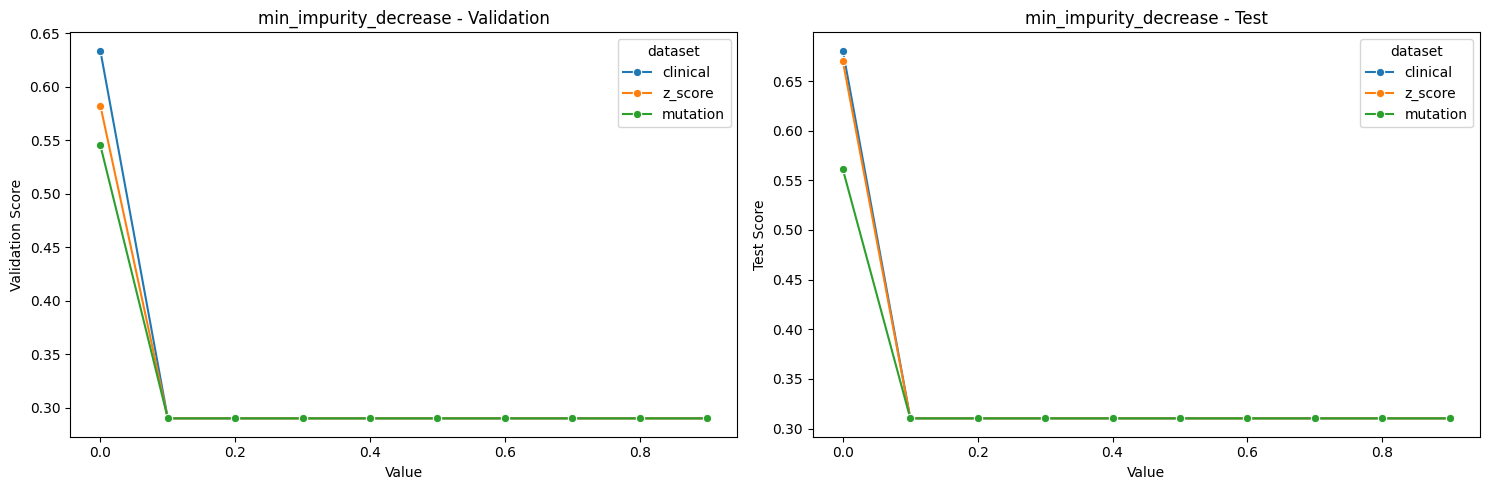

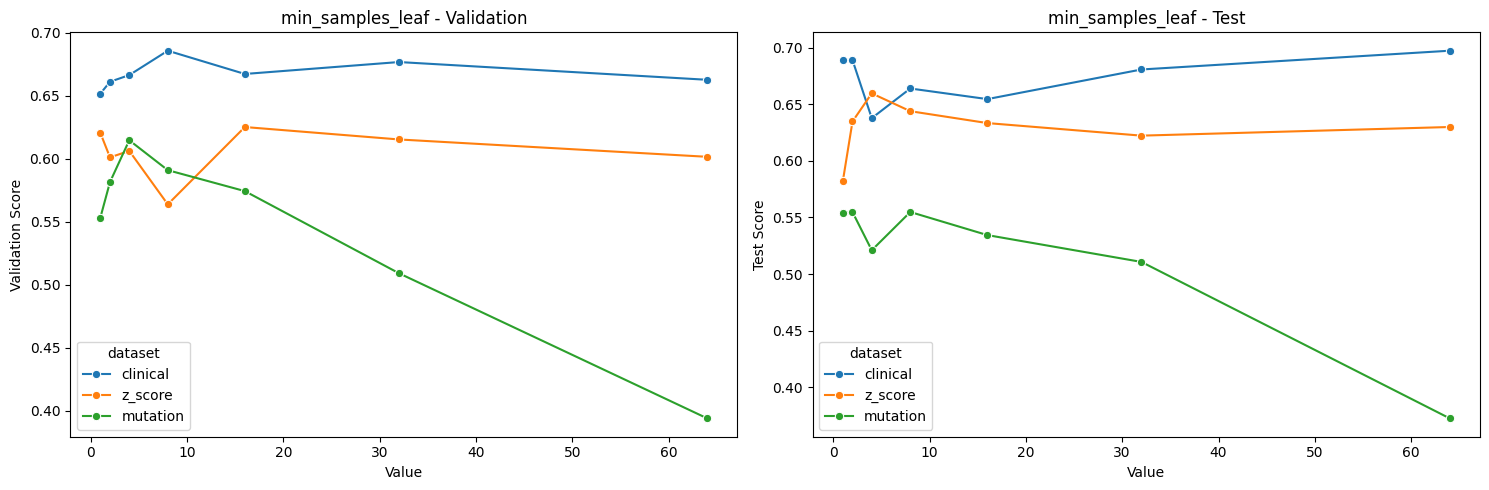

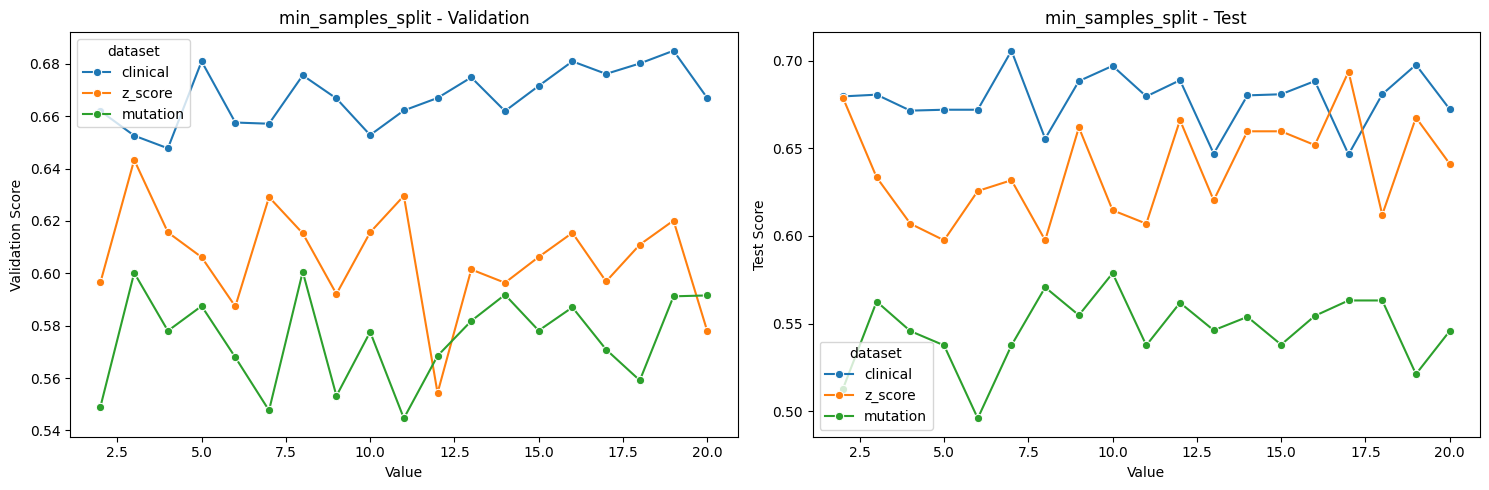

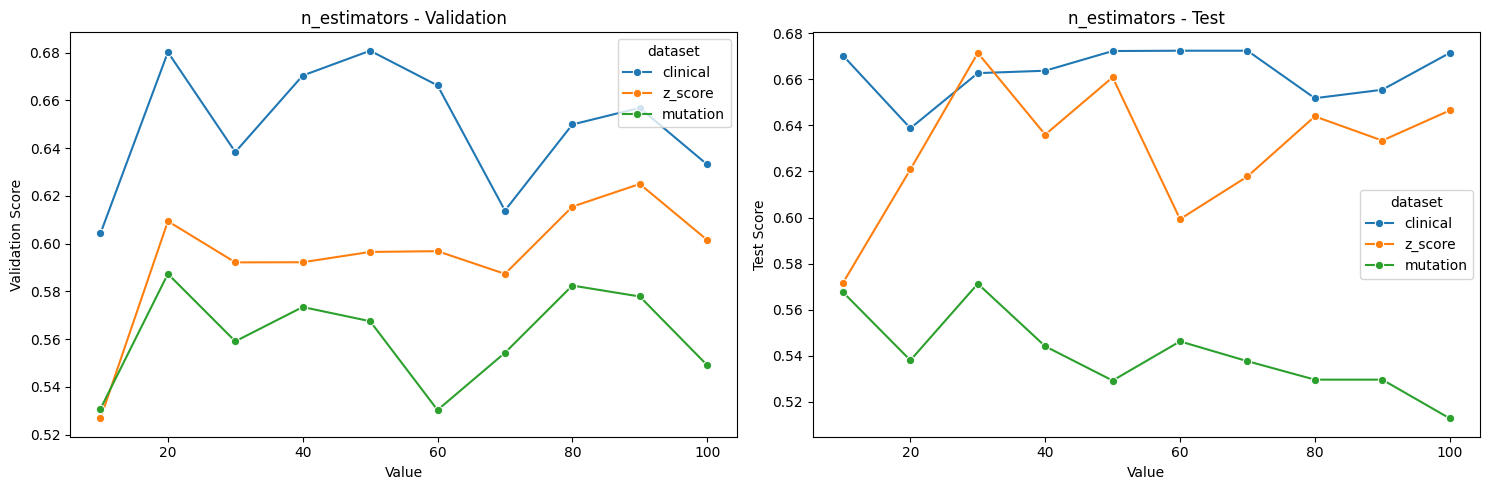

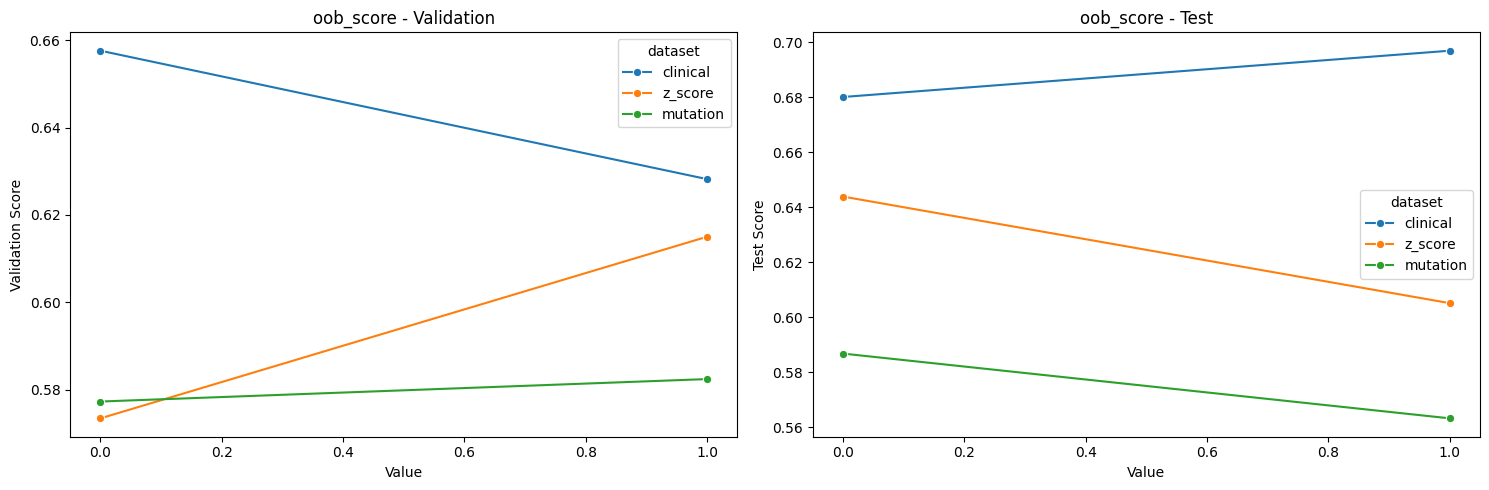

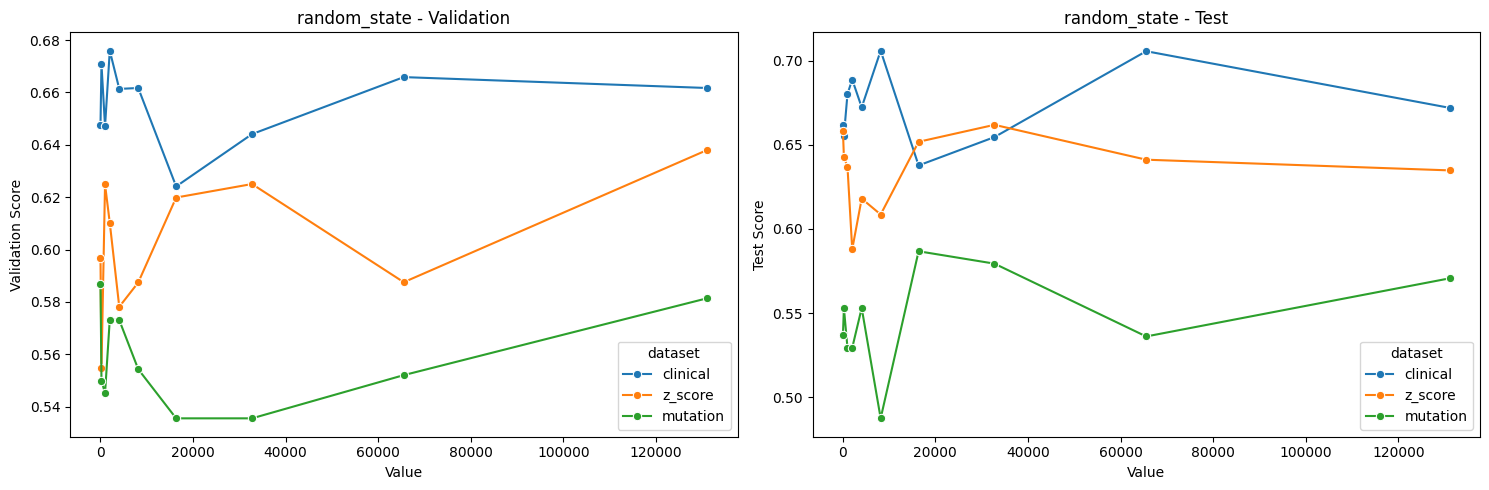

In [63]:
# Group by 'hyperparameter'
grouped = df.groupby('hyperparameter')

metrics = df.columns[3:]

# Plot for each hyperparameter group
for row_idx, (name, group) in enumerate(grouped):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot validation scores
    try:
        sns.lineplot(data=group, x="value", y="f1_val", hue='dataset', marker='o', ax=axs[0])
    except:
        group["value"] = group["value"].astype(str)
        group.sort_values(by='value', inplace=True)
        sns.lineplot(data=group, x="value", y="f1_val", hue='dataset', marker='o', ax=axs[0])
    axs[0].set_title(f'{name} - Validation')
    axs[0].set_ylabel("Validation Score")
    axs[0].set_xlabel("Value")

    # Plot test scores
    sns.lineplot(data=group, x="value", y="f1_test", hue='dataset', marker='o', ax=axs[1])
    axs[1].set_title(f'{name} - Test')
    axs[1].set_ylabel("Test Score")
    axs[1].set_xlabel("Value")

    plt.tight_layout()
    plt.show()

## General (Punto 1)

In [1]:
class Datasets():
    def __init__(self, seed):
        X_clinical_train_val, X_clinical_test, y_train_val, y_test = train_test_split(clinical_attributes, response, test_size=0.1, random_state=seed)
        X_clinical_train, X_clinical_val, y_train, y_val = train_test_split(X_clinical_train_val, y_train_val, test_size=0.2, random_state=seed)

        X_mutation_train_val, X_mutation_test, _, _ = train_test_split(mutation, response, test_size=0.1, random_state=seed)
        X_mutation_train, X_mutation_val, _, _ = train_test_split(X_mutation_train_val, y_train_val, test_size=0.2, random_state=seed)

        X_z_score_train_val, X_z_score_test, _, _ = train_test_split(z_score, response, test_size=0.1, random_state=seed)
        X_z_score_train, X_z_score_val, _, _ = train_test_split(X_z_score_train_val, y_train_val, test_size=0.2, random_state=seed)

        self.datasets = [
            ("clinical", X_clinical_train, X_clinical_val, X_clinical_test),
            ("mutation", X_mutation_train, X_mutation_val, X_mutation_test),
            ("z_score", X_z_score_train, X_z_score_val, X_z_score_test)
        ]
        
    def __iter__(self):
        for dataset in self.datasets:
            yield dataset

In [30]:
class Models():
    algorithms = [
        ("knn", KNeighborsClassifier()),
        ("dt", DecisionTreeClassifier()),
        ("svm", SVC()),
        ("rf", RandomForestClassifier()),
        ("ada", AdaBoostClassifier()) 
    ]
    
    def train_all(self, data, response):
        for name, algorithm in self.algorithms:
            algorithm.fit(X=data, y=response)

    def save(self, sufix):
        for name, algorithm in self.algorithms:
            dump(algorithm, f"models/{name}_model_{sufix}.joblib")

    def predict(self, X_val):
        predictions = []

        for name, model in self.algorithms:
            predictions.append((name, model.predict(X_val)))
        
        return predictions
    
    def cross_validate_model(self, name, model, X, y, cv):
        return [ name, cross_val_score(model, X, y, cv=cv).mean()]
    
    def cross_validate(self, X, y, cv):
        score_list = []
        for name, model in self.algorithms:
            score_list.append(self.cross_validate_model(name, model, X, y, cv))
        
        return pd.DataFrame(score_list, columns=["algorithm", "score"])

    def cv_predict(self, X, y, cv):
        self.predictions = cross_val_predict(self.model_instance, X, y, cv=cv)
        return self.get_metrics(y)

    def get_metrics(self, X_val,y_true):
        export_list = []
        predictions = self.predict(X_val)
        for name, y_pred in predictions:
            acc_value = accuracy_score(y_pred=y_pred, y_true=y_true) 
            recall_value = recall_score(y_pred=y_pred, y_true=y_true)
            precision_value = precision_score(y_pred=y_pred, y_true=y_true) 
            f1_value = f1_score(y_pred=y_pred, y_true=y_true)
            mcc_value = matthews_corrcoef(y_pred=y_pred, y_true=y_true)
            cm = confusion_matrix(y_pred=y_pred, y_true=y_true)
            export_list.append((name, acc_value, recall_value, precision_value, f1_value, mcc_value, cm))
    
        return pd.DataFrame(export_list, columns=["algorithm", "acc", "recall", "precision", "f1", "mcc", "cm"])

In [ ]:
model_instance = Models()
model_instance.train_all(X_clinical_train, y_train)
metrics_val = model_instance.get_metrics(X_clinical_val, y_val)
metrics_test = model_instance.get_metrics(X_clinical_test, y_test)
metrics = pd.merge(metrics_val, metrics_test, on="algorithm", suffixes=('_val', '_test'))
metrics

In [31]:
# No usar
seeds = [42, 255, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
metrics = pd.DataFrame(columns=["seed", "algorithm", "acc_val", "recall_val", "precision_val", "f1_val", "mcc_val", "cm_val", "acc_test", "recall_test", "precision_test", "f1_test", "mcc_test", "cm_test"])
for seed in seeds:
    datasets = Datasets(seed)
    print(f"running {name}")
    model_instance = Models()
    model_instance.train_all(X_train, y_train)
    metrics_val = model_instance.get_metrics(X_val, y_val)
    metrics_test = model_instance.get_metrics(X_test, y_test)
    metrics_val_test = pd.merge(metrics_val, metrics_test, on="algorithm", suffixes=('_val', '_test'))
    metrics = pd.merge(metrics, metrics_val_test, on="algorithm", suffixes=('_val', '_test'))
metrics

model_instance = Models()
model_instance.train_all(X_clinical_train, y_train)
metrics_val = model_instance.get_metrics(X_clinical_val, y_val)
metrics_test = model_instance.get_metrics(X_clinical_test, y_test)
metrics = pd.merge(metrics_val, metrics_test, on="algorithm", suffixes=('_val', '_test'))
metrics

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A

,algorithm,acc_val,recall_val,precision_val,f1_val,mcc_val,cm_val,acc_test,recall_test,precision_test,f1_test,mcc_test,cm_test
0,knn,0.610329,0.540816,0.582418,0.560847,0.211967,"[[77, 38], [45, 53]]",0.554622,0.631579,0.529412,0.576000,0.116543,"[[30, 32], [21, 36]]"
1,dt,0.568075,0.581633,0.527778,0.553398,0.137727,"[[64, 51], [41, 57]]",0.605042,0.596491,0.586207,0.591304,0.209276,"[[38, 24], [23, 34]]"
2,svm,0.629108,0.602041,0.595960,0.598985,0.254034,"[[75, 40], [39, 59]]",0.655462,0.684211,0.629032,0.655462,0.313243,"[[39, 23], [18, 39]]"
3,rf,0.638498,0.602041,0.608247,0.605128,0.271823,"[[77, 38], [39, 59]]",0.705882,0.736842,0.677419,0.705882,0.414261,"[[42, 20], [15, 42]]"
4,ada,0.643192,0.642857,0.605769,0.623762,0.285501,"[[74, 41], [35, 63]]",0.714286,0.719298,0.694915,0.706897,0.428612,"[[44, 18], [16, 41]]"


## Mini analisis

- **KNN**: similar resultados en validacion y testeo
- **DT**: Tiene una diferencia bastante grande en f1 score lo que PODRIA indicar overfiting (Hay que ver si se comporta similar con otras semillas)
- **SVM**: similar resultados en validacion y testeo. Generaliza mejor
- **RF**: Buena consistencia en recall pero baja performance en MCC entre validacion y test. Pero no teiene tanto overfitting.
- **Adaboost**: Generaliza bien y da por poquito los mejores resultados.

DT es el que tiene mas sobreajuste

In [32]:
model_instance = Models()
model_instance.train_all(X_z_score_train, y_train)
metrics_val = model_instance.get_metrics(X_z_score_val, y_val)
metrics_test = model_instance.get_metrics(X_z_score_test, y_test)
metrics = pd.merge(metrics_val, metrics_test, on="algorithm", suffixes=('_val', '_test'))
metrics

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A

,algorithm,acc_val,recall_val,precision_val,f1_val,mcc_val,cm_val,acc_test,recall_test,precision_test,f1_test,mcc_test,cm_test
0,knn,0.624413,0.642857,0.583333,0.611650,0.250775,"[[70, 45], [35, 63]]",0.638655,0.736842,0.600000,0.661417,0.289521,"[[34, 28], [15, 42]]"
1,dt,0.558685,0.540816,0.519608,0.530000,0.114466,"[[66, 49], [45, 53]]",0.563025,0.614035,0.538462,0.573770,0.130608,"[[32, 30], [22, 35]]"
2,svm,0.657277,0.653061,0.621359,0.636816,0.313098,"[[76, 39], [34, 64]]",0.697479,0.736842,0.666667,0.700000,0.398471,"[[41, 21], [15, 42]]"
3,rf,0.629108,0.663265,0.585586,0.622010,0.262660,"[[69, 46], [33, 65]]",0.689076,0.789474,0.642857,0.708661,0.392060,"[[37, 25], [12, 45]]"
4,ada,0.582160,0.581633,0.542857,0.561576,0.163734,"[[67, 48], [41, 57]]",0.630252,0.701754,0.597015,0.645161,0.268174,"[[35, 27], [17, 40]]"


## Mini analisis

- **KNN**: Hay una mejora pequeña en las metricas.
- **DT**: Presenta una pequeña mejora en test pero no es tanto sobreajuste.
- **SVM**: Es el mejor de todas las metricas especialmente en F1 y MCC.
- **RF**: Muestra una mejora en test por lo que se traduce a una mejora en generalizacion
- **ADA**: Majora en test especialmente en F1-Score y MCC lo que indica una buena generalizacion.

In [33]:
model_instance = Models()
model_instance.train_all(X_mutation_train, y_train)
metrics_val = model_instance.get_metrics(X_mutation_val, y_val)
metrics_test = model_instance.get_metrics(X_mutation_test, y_test)
metrics = pd.merge(metrics_val, metrics_test, on="algorithm", suffixes=('_val', '_test'))
metrics

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A

,algorithm,acc_val,recall_val,precision_val,f1_val,mcc_val,cm_val,acc_test,recall_test,precision_test,f1_test,mcc_test,cm_test
0,knn,0.427230,0.530612,0.406250,0.460177,-0.132571,"[[39, 76], [46, 52]]",0.478992,0.578947,0.464789,0.515625,-0.034578,"[[24, 38], [24, 33]]"
1,dt,0.525822,0.540816,0.486239,0.512077,0.053703,"[[59, 56], [45, 53]]",0.495798,0.526316,0.476190,0.500000,-0.005947,"[[29, 33], [27, 30]]"
2,svm,0.577465,0.642857,0.533898,0.583333,0.165036,"[[60, 55], [35, 63]]",0.504202,0.491228,0.482759,0.486957,0.007353,"[[32, 30], [29, 28]]"
3,rf,0.568075,0.632653,0.525424,0.574074,0.146086,"[[59, 56], [36, 62]]",0.521008,0.508772,0.500000,0.504348,0.041007,"[[33, 29], [28, 29]]"
4,ada,0.572770,0.612245,0.530973,0.568720,0.151174,"[[62, 53], [38, 60]]",0.428571,0.385965,0.400000,0.392857,-0.146584,"[[29, 33], [35, 22]]"


## Mini analisis

- **KNN**: Buena generalizacion pero tiene un MCC bajo lo cual indica que no es un buen modelo
- **DT**: Buena generalizacion pero tiene un MCC bajo lo cual indica que no es un buen modelo
- **SVM**: Los resultados en testo son peores en todas las metricas lo cual indica un posible sobreajuste
- **RF**:  Las metricas son peores en MCC y Recall, posible sobreajuste
- **ADA**: Muestra un fuerte sobreajuste en todas las metricas, especialmente F1 y MCC.

## Cross validation

In [36]:
model_insstance = Models()
metrics_clinical = model_instance.cross_validate(X_clinical_train, y_train, 5)
model_insstance = Models()
metrics_z_score = model_instance.cross_validate(X_z_score_train, y_train, 5)
model_insstance = Models()
metrics_mutation = model_instance.cross_validate(X_mutation_train, y_train, 5)
metrics = pd.merge(metrics_clinical, metrics_z_score, on="algorithm", suffixes=('_clinical', '_z_score'))
metrics = pd.merge(metrics, metrics_mutation, on="algorithm")
metrics = metrics.rename(columns={"score": "score_mutation"})
metrics

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarnin

,algorithm,score_clinical,score_z_score,score_mutation
0,knn,0.600000,0.588235,0.508235
1,dt,0.582353,0.556471,0.524706
2,svm,0.668235,0.630588,0.503529
3,rf,0.671765,0.618824,0.534118
4,ada,0.650588,0.571765,0.521176


# Ensemble

In [15]:
model_clinical = RandomForestClassifier()
model_z_score = SVC()
model_mutation = RandomForestClassifier()

model_clinical.fit(X_clinical_train, y_train)
model_z_score.fit(X_z_score_train, y_train)
model_mutation.fit(X_mutation_train, y_train)

pred_clinical = model_clinical.predict(X_clinical_val)
pred_z_score = model_z_score.predict(X_z_score_val)
pred_mutation = model_mutation.predict(X_mutation_val)

X_meta_train = np.column_stack((pred_clinical, pred_z_score, pred_mutation))

y_meta_train = y_val

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [16]:
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_meta_train)

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
pred_clinical_test = model_clinical.predict(X_clinical_test)
pred_z_score_test = model_z_score.predict(X_z_score_test)
pred_mutation_test = model_mutation.predict(X_mutation_test)

X_meta_test = np.column_stack((pred_clinical_test, pred_z_score_test, pred_mutation_test))

final_predictions = meta_model.predict(X_meta_test)

In [20]:
stacked_accuracy = accuracy_score(y_test, final_predictions)
stacked_accuracy

0.6722689075630253

## Cross validation

In [44]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

meta_features = np.zeros((len(X_clinical_train), 3))

In [47]:
model_clinical = RandomForestClassifier()
model_z_score = SVC()
model_mutation = RandomForestClassifier()
for train_idx, val_idx in kf.split(X_clinical_train):
    X_ctrain, X_cval = X_clinical_train.to_numpy()[train_idx], X_clinical_train.to_numpy()[val_idx]
    X_ztrain, X_zval = X_z_score_train.to_numpy()[train_idx], X_z_score_train.to_numpy()[val_idx]
    X_mtrain, X_mval = X_mutation_train.to_numpy()[train_idx], X_mutation_train.to_numpy()[val_idx]

    y_train_cv, y_val_cv = y_train.to_numpy()[train_idx], y_train.to_numpy()[val_idx]

    model_clinical.fit(X_ctrain, y_train_cv)
    model_z_score.fit(X_ztrain, y_train_cv)
    model_mutation.fit(X_mtrain, y_train_cv)

    pred_clinical = model_clinical.predict(X_cval)
    pred_z_score = model_z_score.predict(X_zval)
    pred_mutation = model_mutation.predict(X_mval)

    meta_features[val_idx, 0] = pred_clinical
    meta_features[val_idx, 1] = pred_z_score
    meta_features[val_idx, 2] = pred_mutation

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-v

In [48]:
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_train.to_numpy())

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
stacked_metrics = []

for train_idx, val_idx in kf.split(X_clinical_train):
    model_clinical.fit(X_clinical_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    model_z_score.fit(X_z_score_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    model_mutation.fit(X_mutation_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])

    pred_clinical = model_clinical.predict(X_clinical_train.to_numpy()[val_idx])
    pred_z_score = model_z_score.predict(X_z_score_train.to_numpy()[val_idx])
    pred_mutation = model_mutation.predict(X_mutation_train.to_numpy()[val_idx])

    X_meta_test = np.column_stack((pred_clinical, pred_z_score, pred_mutation))
    final_predictions = meta_model.predict(X_meta_test)

    accuracy = accuracy_score(y_train.to_numpy()[val_idx], final_predictions)
    precision = precision_score(y_train.to_numpy()[val_idx], final_predictions, average='weighted')
    recall = recall_score(y_train.to_numpy()[val_idx], final_predictions, average='weighted')
    f1 = f1_score(y_train.to_numpy()[val_idx], final_predictions, average='weighted')
    mcc = matthews_corrcoef(y_train.to_numpy()[val_idx], final_predictions)

    stacked_metrics.append([accuracy, precision, recall, f1, mcc])

avg_stacked_metrics = np.mean(stacked_metrics, axis=0)

pd.DataFrame(avg_stacked_metrics, index=["accuracy", "precision", "recall", "f1", "mcc"], columns=["mean"])

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-v

,mean
accuracy,0.669412
precision,0.671401
recall,0.669412
f1,0.669192
mcc,0.338761


## Conclusion
Mejora un poco con respecto a la tirada de moneda